In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("drugsCom_raw.tsv",sep="\t")
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [42]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


# EDA and DATA VISUALIZATION

In [44]:
# Missing values
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
len(df['drugName'].unique()) 

3436

In [47]:
# Most popular drugs
# Top 20
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

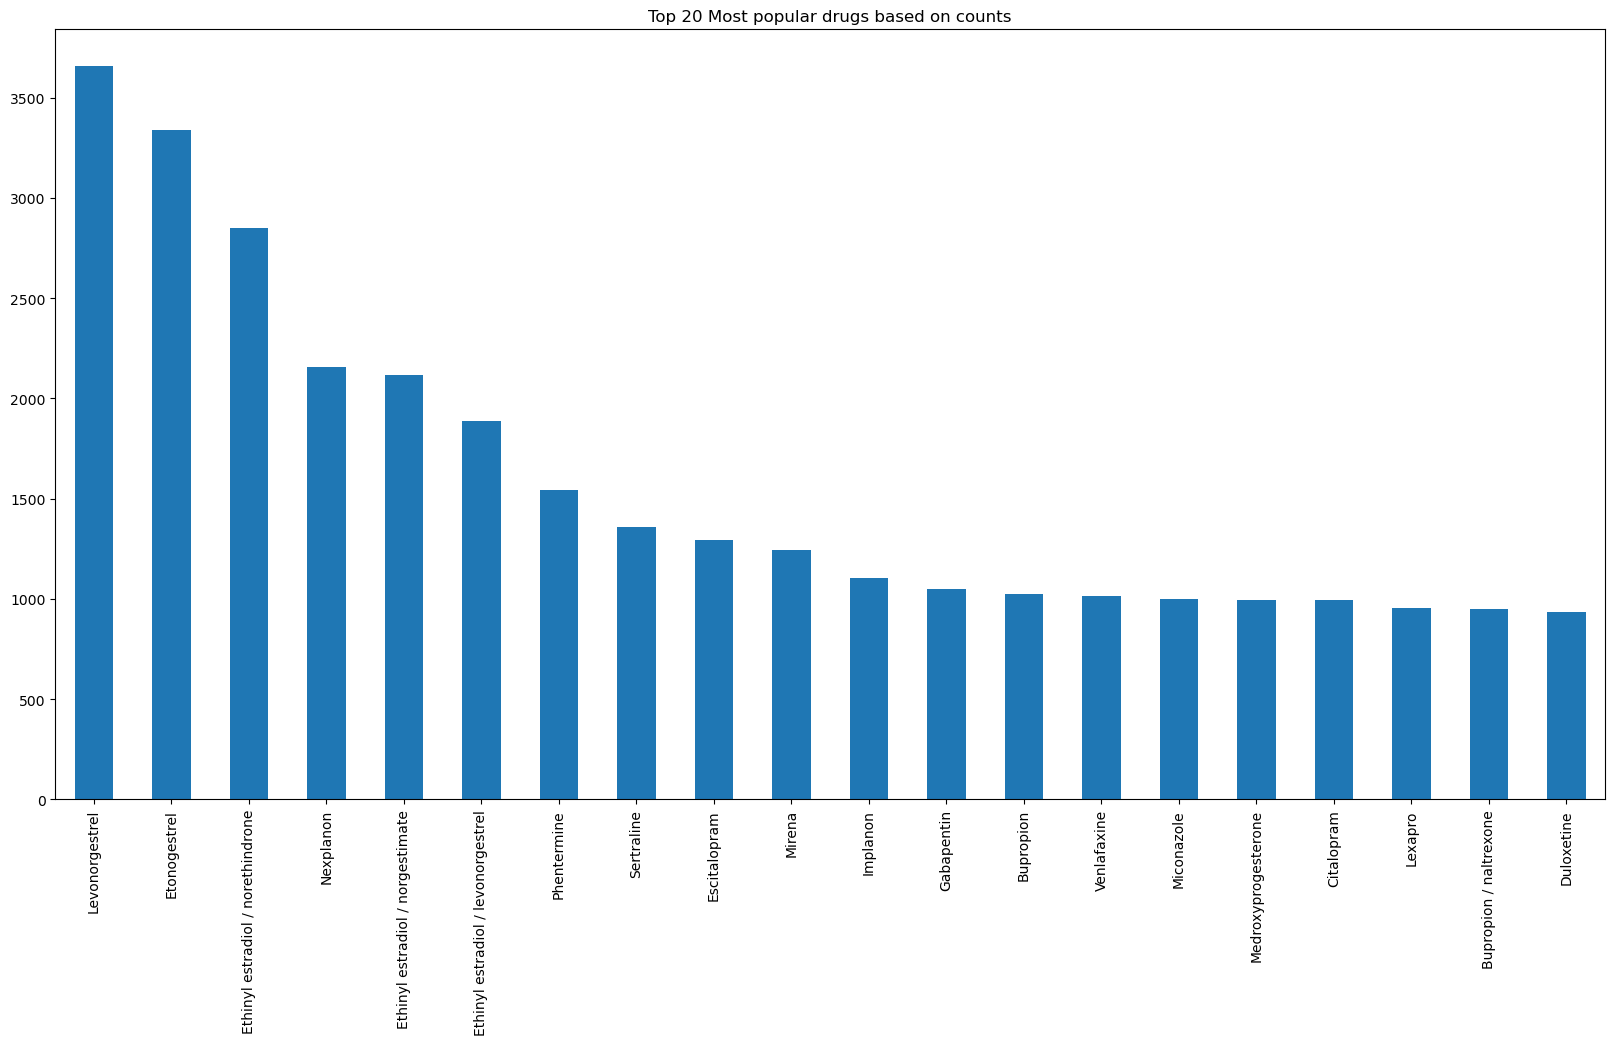

In [48]:
# Top 20 Drugs(MOst Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Most popular drugs based on counts')
plt.show()

<Figure size 1500x1000 with 0 Axes>

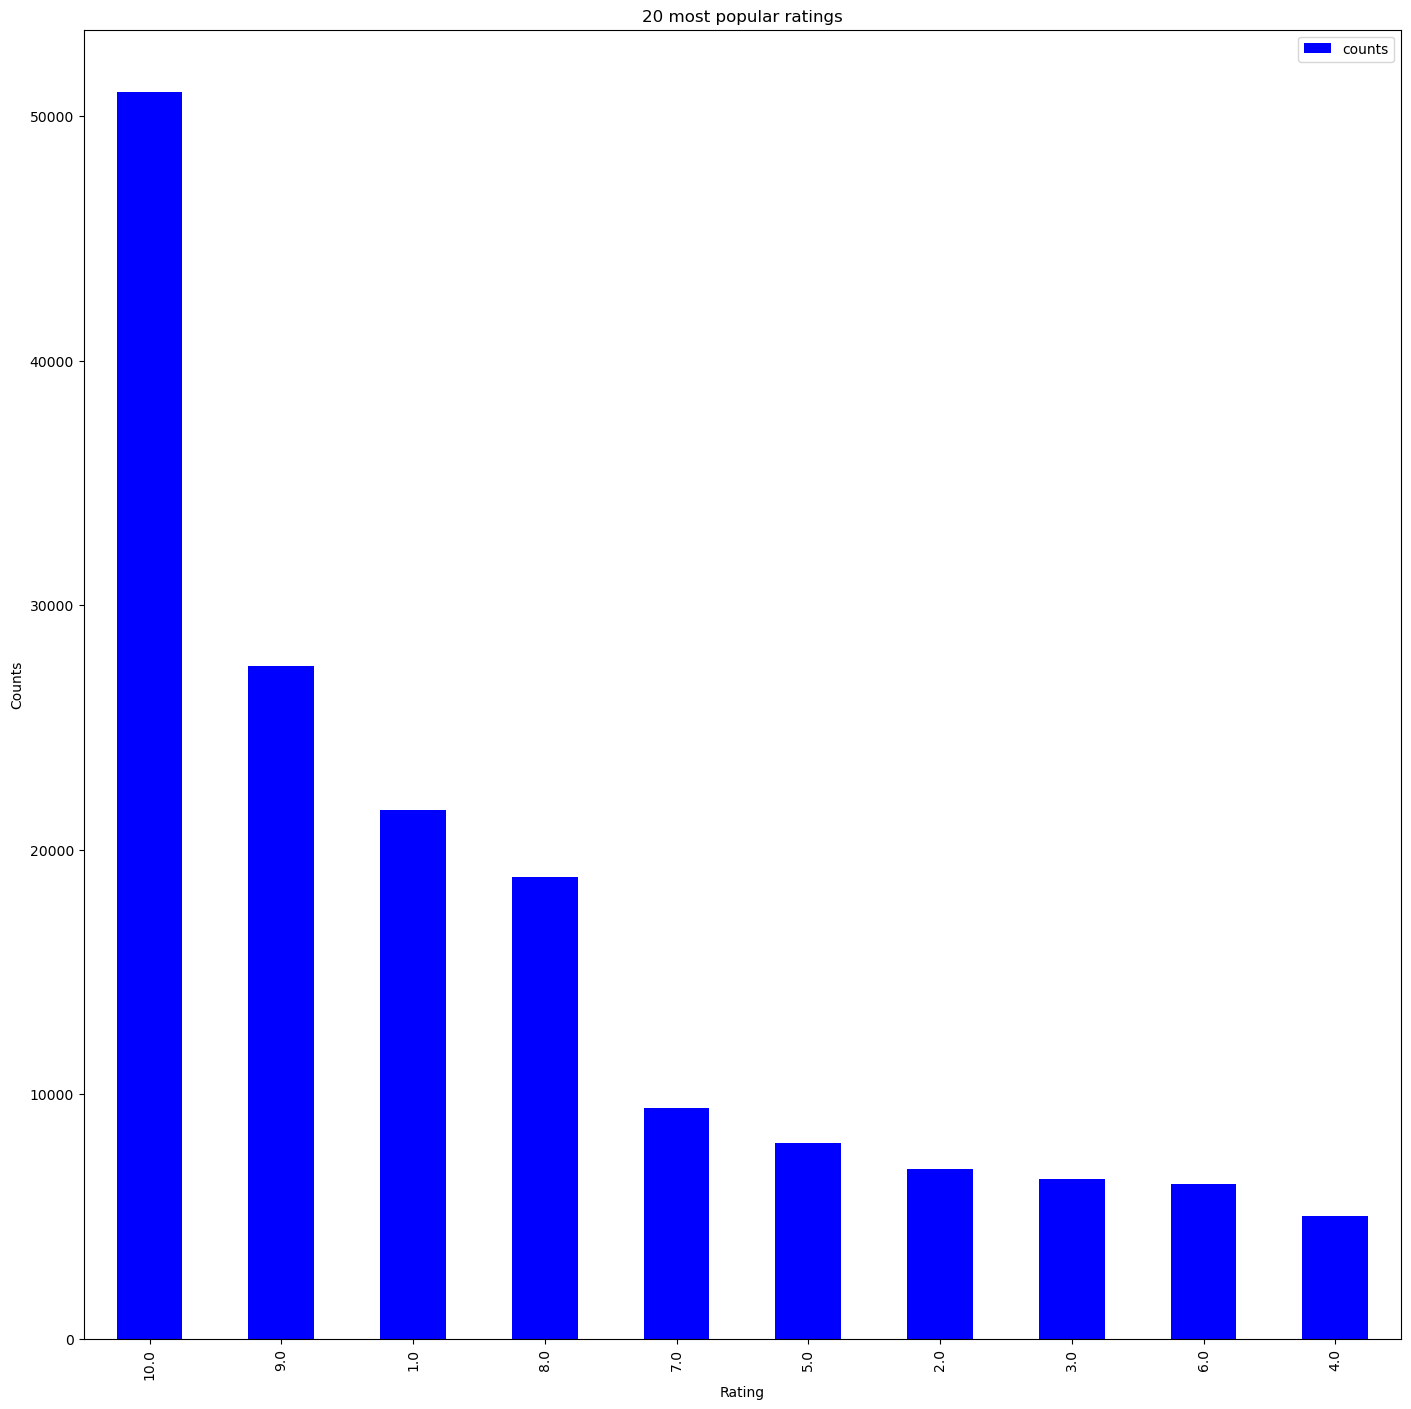

In [49]:
# Grouping the data by rating and count the frequency of each rating
rating_counts = df.groupby('rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = rating_counts.sort_values(by='counts',ascending=False)

# Plot a bar chart of the 20 most popular ratings
plt.figure(figsize=(15,10))
rating_counts[:20].plot.bar(x='rating',y='counts',color='blue')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('20 most popular ratings')
plt.show()

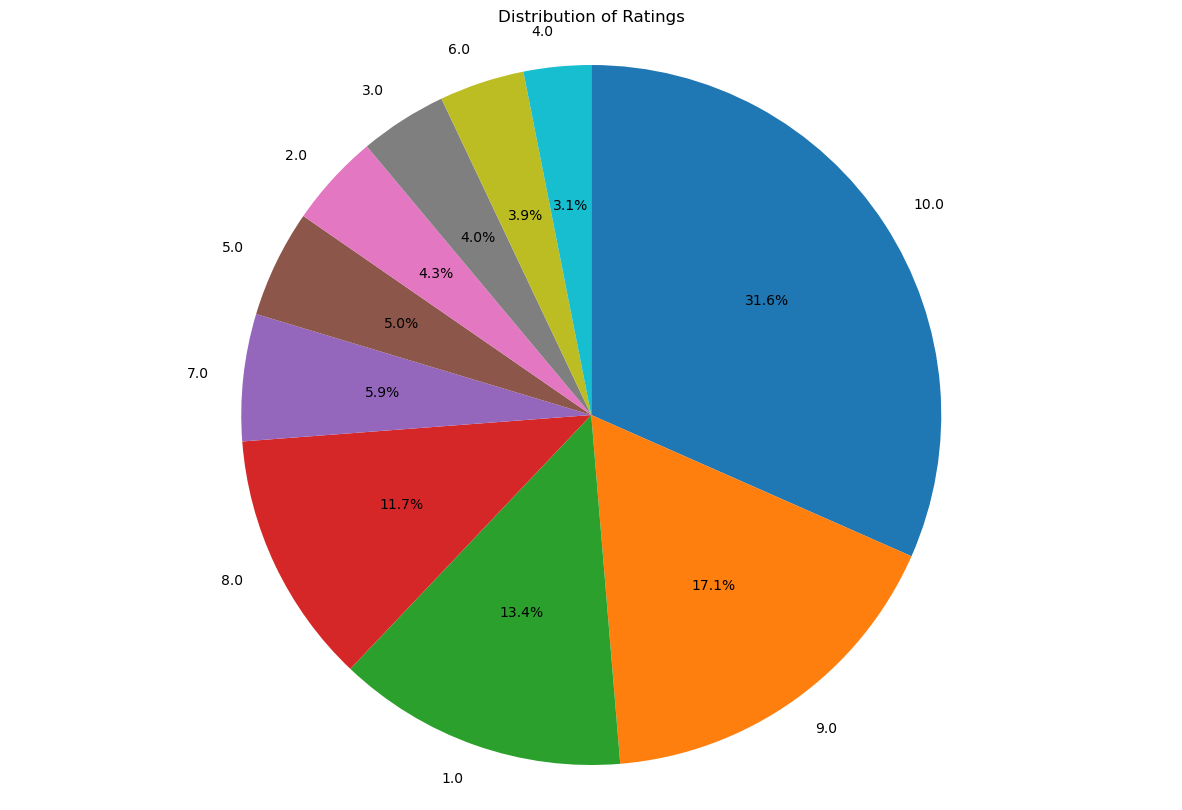

In [50]:
# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(rating_counts['counts'], labels=rating_counts['rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

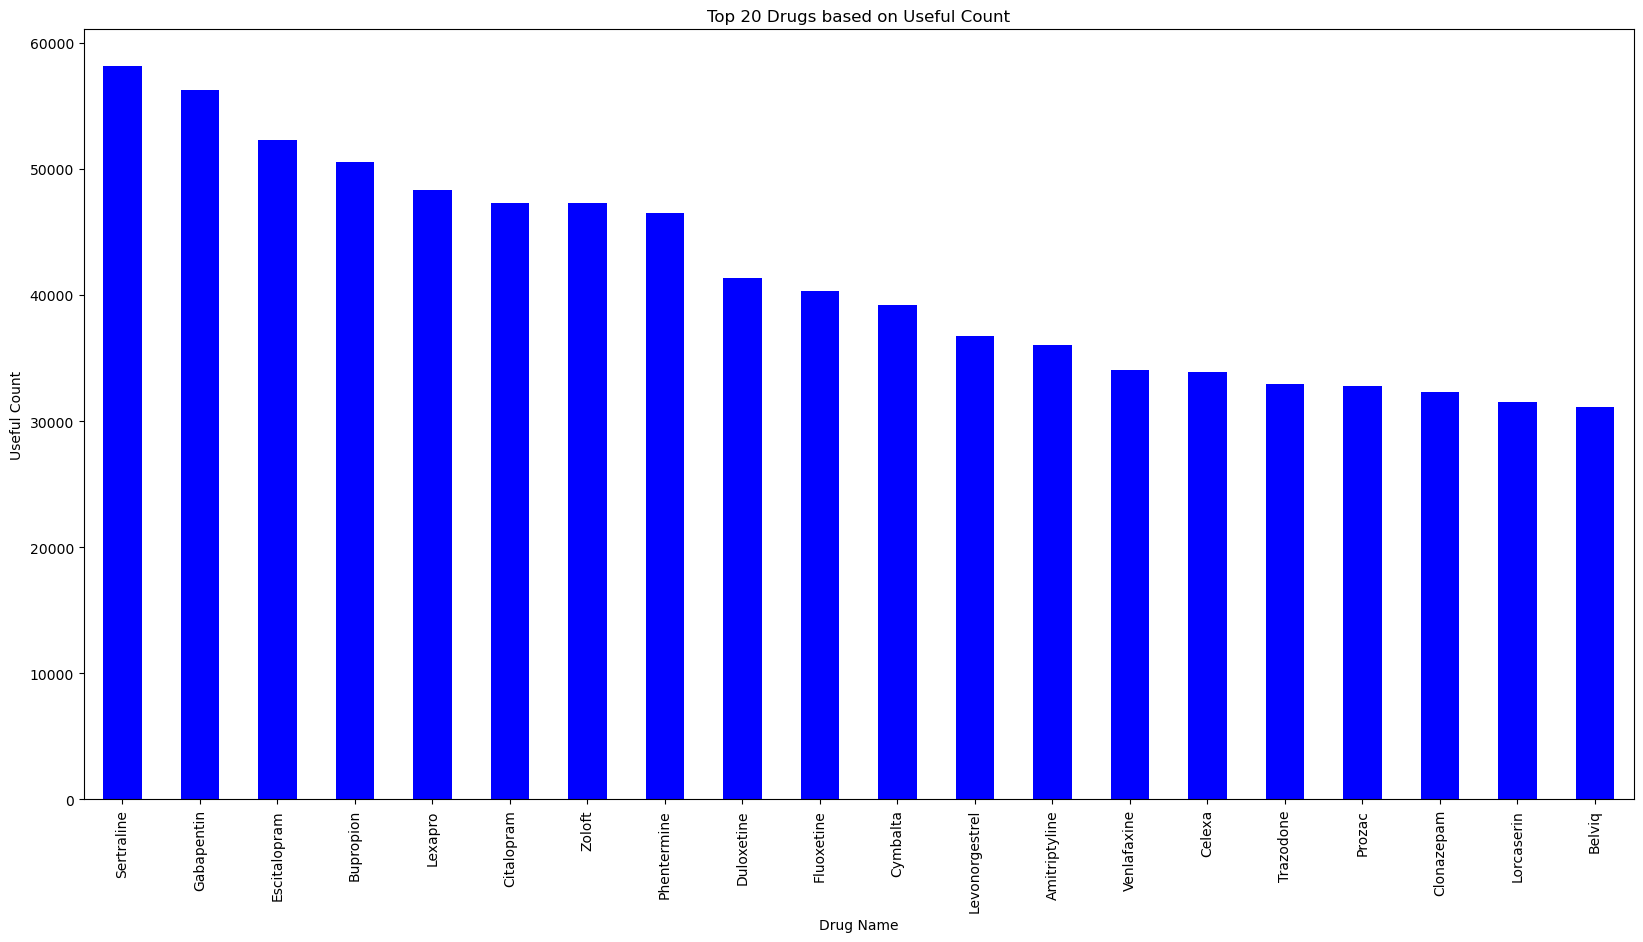

In [51]:
# Get the 20 most popular drugs based on usefulCount
plt.figure(figsize=(20,10))
top_20_drugs = df.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False).head(20)

# Plot the bar plot
top_20_drugs.plot(kind='bar', color='blue')
plt.xlabel('Drug Name')
plt.ylabel('Useful Count')
plt.title('Top 20 Drugs based on Useful Count')
plt.xticks(rotation=90)
plt.show()

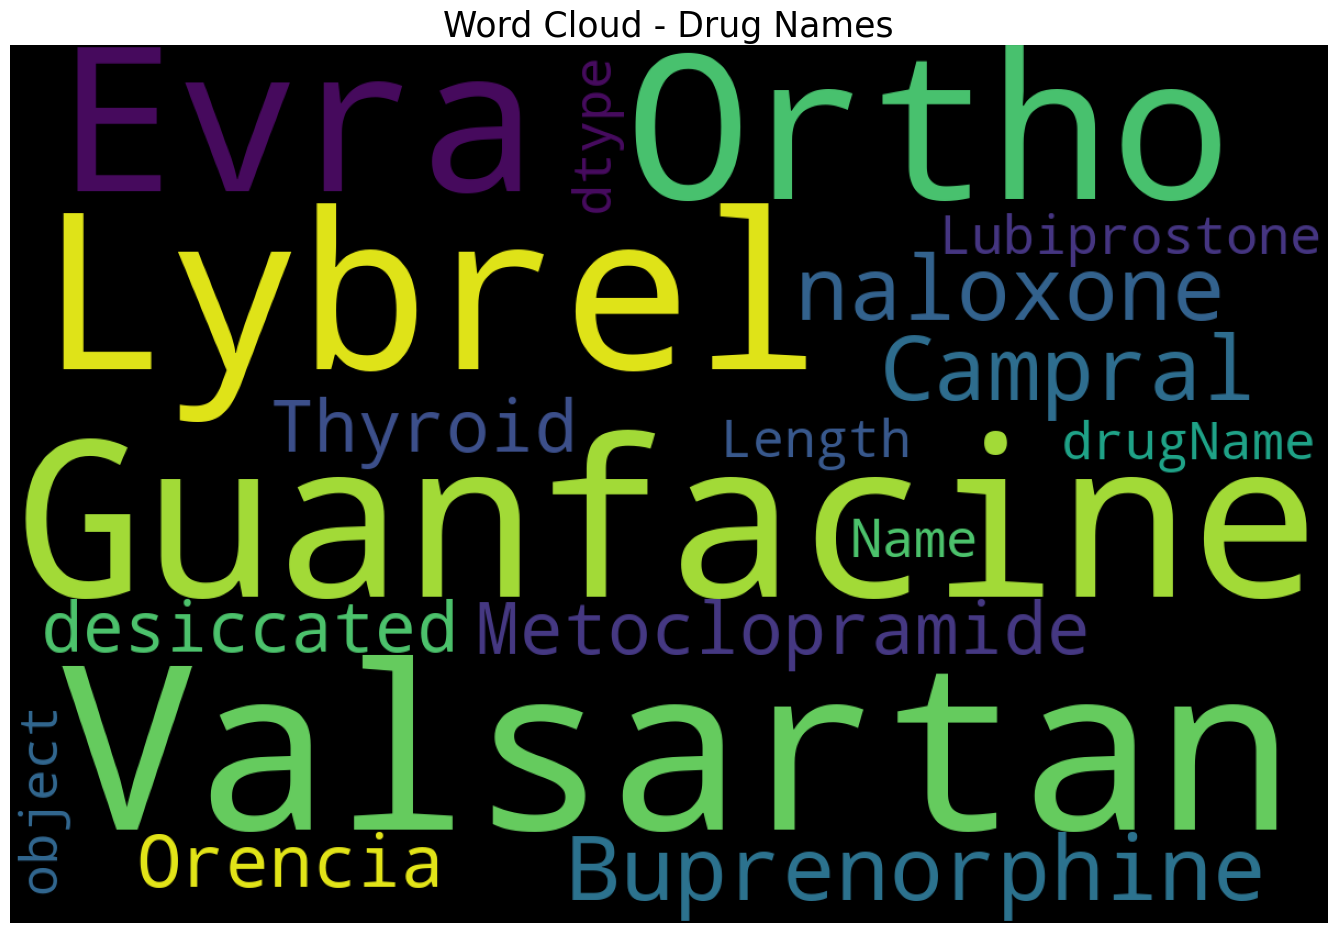

In [52]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

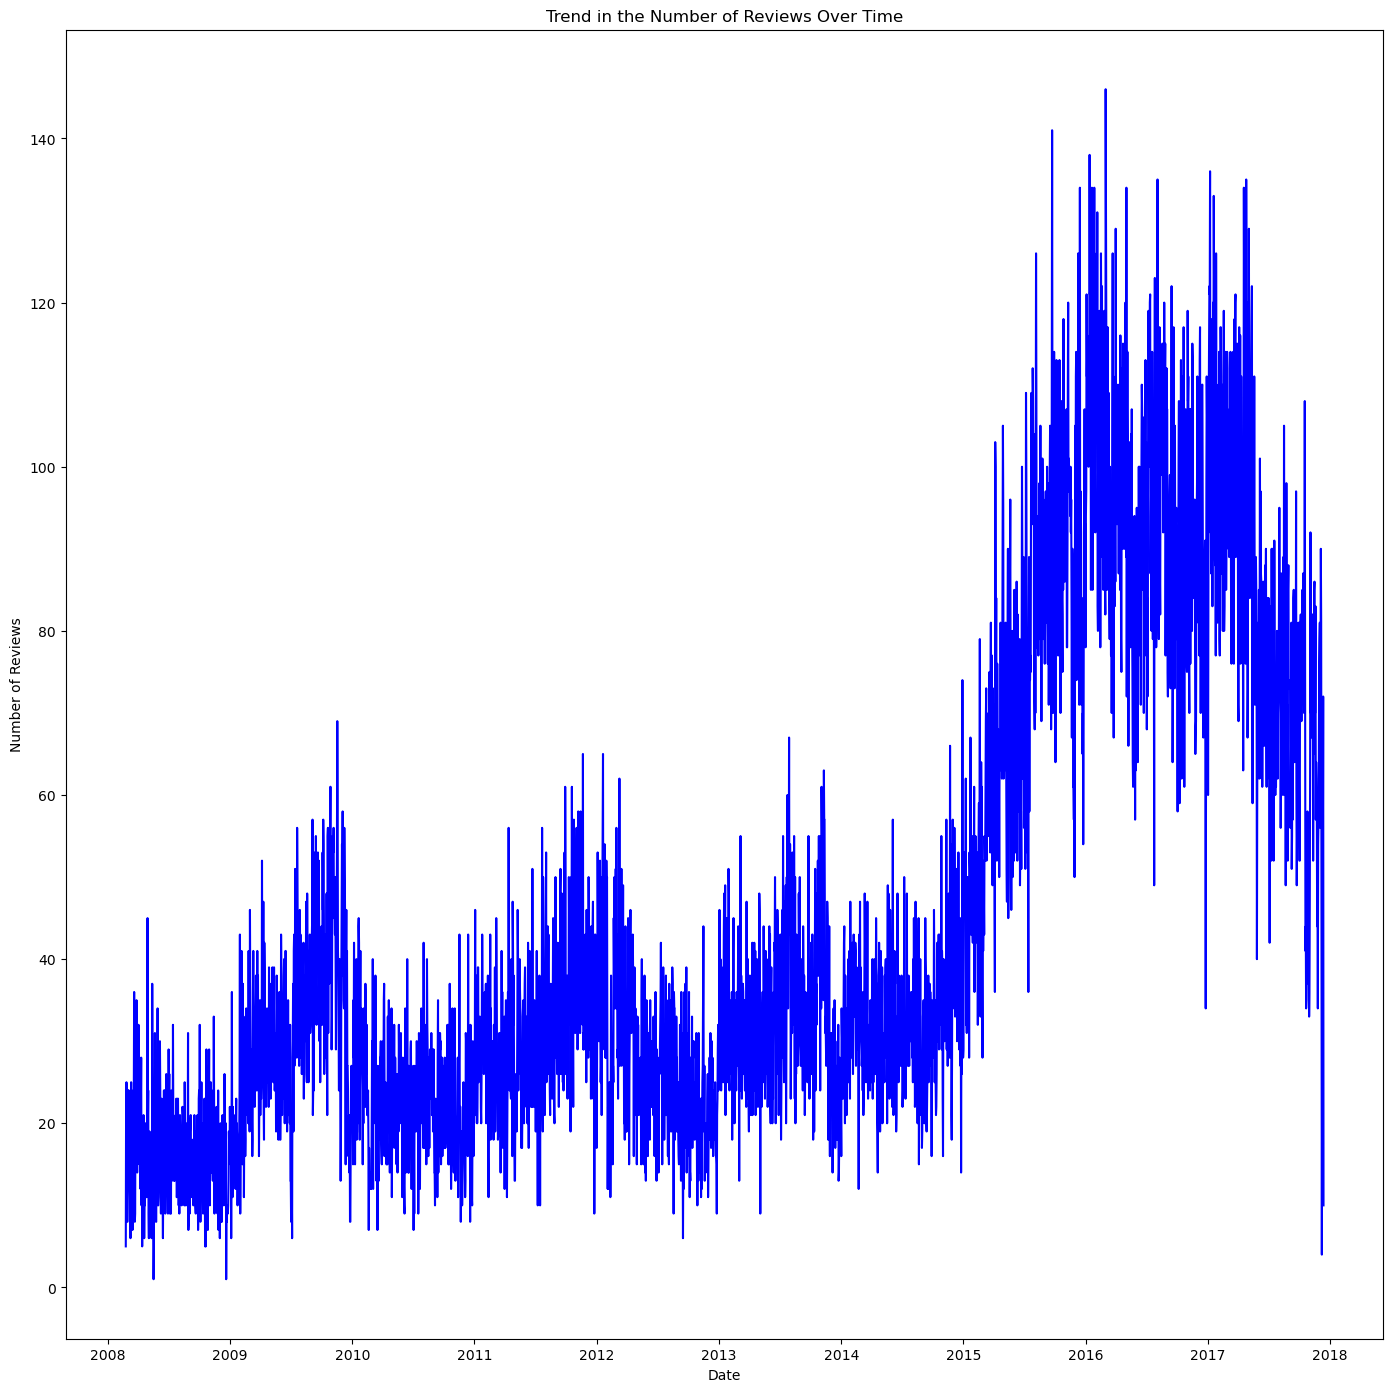

In [53]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of reviews for each date
reviews_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='counts')

# Plot a line chart of the trend in the number of reviews over time
plt.plot(reviews_per_date['date'], reviews_per_date['counts'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend in the Number of Reviews Over Time')
plt.show()

Interpretation:

1-Improved Accessibility: There might have been improvements in the accessibility of the drug, either through increased availability or decreased cost, which led to an increase in the number of patients using the drug and writing reviews.

2-Increased Use of Online Platforms: The increase in the use of online platforms for reviewing drugs and conditions might have contributed to the increase in the number of reviews from 2015 onwards.

3-Changes in Marketing Strategies: The drug manufacturer or the healthcare industry might have changed their marketing strategies to increase the visibility of the drug, which led to an increase in the number of patients using the drug and writing reviews.

# Feature Engineering/Data preprocessing

In [54]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\phoneclicker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phoneclicker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [55]:
"""
def review_clean(review): 
    # changing review to lower cases.
    lower = review.str.lower()
    
    # Replacing the repeating pattern of '
    pattern_remove = lower.str.replace("'", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe
    """

'\ndef review_clean(review): \n    # changing review to lower cases.\n    lower = review.str.lower()\n    \n    # Replacing the repeating pattern of \'\n    pattern_remove = lower.str.replace("\'", "")\n    \n    # Removing all the special Characters\n    special_remove = pattern_remove.str.replace(r\'[^\\w\\d\\s]\',\' \')\n    \n    # Removing all the non ASCII characters\n    ascii_remove = special_remove.str.replace(r\'[^\x00-\x7f]+\',\' \')\n    \n    # Removing the leading and trailing Whitespaces\n    whitespace_remove = ascii_remove.str.replace(r\'^\\s+|\\s+?$\',\'\')\n    \n    # Replacing multiple Spaces with Single Space\n    multiw_remove = whitespace_remove.str.replace(r\'\\s+\',\' \')\n    \n    # Replacing Two or more dots with one\n    dataframe = multiw_remove.str.replace(r\'\\.{2,}\', \' \')\n    \n    return dataframe\n    '

In [56]:
def review_clean(review):
         x=re.sub('[^a-zA-Z ]', '', x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x
    

In [57]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,2015-09-19,79


In [58]:
df =df[ (df['condition']=='Depression') 
                 |(df['condition']=='High Blood Pressure')
                 |(df['condition']=='Diabetes, Type 2')]







In [59]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,2017-03-09,54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07,3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,2016-04-27,3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,2017-10-24,24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,2013-06-20,166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,2009-07-15,39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,2009-07-18,25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,2015-10-23,47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,2016-07-17,33


In [60]:
df['review'] = df['review'].apply(lambda x: clean_review(x))

The importance of the date feature depends on the business problem and the type of model being used. In some cases, the date feature may be important in identifying patterns and trends over time. For example, if you are building a time-series model, the date feature would be an important input for the model. However, in other cases, the date feature may not be as relevant. For instance, if you are building a model to predict the rating based on the review, the date feature may not have a significant impact on the model's predictions.

In [61]:
df.drop(['date'],axis=1,inplace=True)

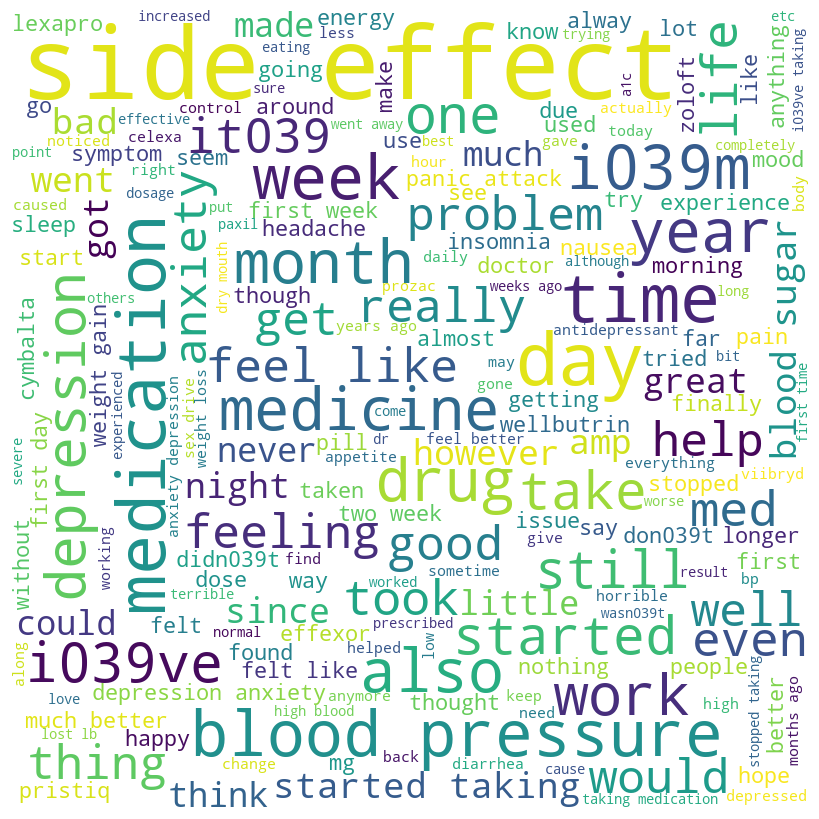

In [62]:
# Get the stopwords as a list
stopwords = list(stopwords.words('english'))

# Join all the reviews into a single string
reviews_text = " ".join(review for review in df.review)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [63]:
df

,Unnamed: 0,drugName,condition,review,rating,usefulCount
11,75612,L-methylfolate,Depression,taken antidepressants years improvement mostly...,10.0,54
31,96233,Sertraline,Depression,1 week zoloft anxiety mood swings take 50mg mo...,8.0,3
44,121333,Venlafaxine,Depression,gp started venlafaxine yesterday help depressi...,4.0,3
50,156544,Dulaglutide,"Diabetes, Type 2",hey guys it039s 4 months since last post wante...,10.0,24
67,131909,Effexor XR,Depression,medicine saved life wits end antidepressants r...,10.0,166
...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,fourth blood pressure pill feels like partly w...,4.0,39
161258,34443,Bystolic,High Blood Pressure,bystolic feet arms numb blood sugars became se...,1.0,25
161278,86533,Invokana,"Diabetes, Type 2",got diagnosed type 2 doctor prescribed invokan...,9.0,47
161286,93069,Vortioxetine,Depression,third med i039ve tried anxiety mild depression...,2.0,33


## MODEL BUILDING

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error

In [65]:
df["rating"] = df["rating"].astype(int)

In [66]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(df["review"])

In [67]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews, df["condition"], test_size=0.25, random_state=42)

## LOGISTIC REGRESSION

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# Train the model
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [70]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.93      0.99      0.96      2257
   Diabetes, Type 2       0.98      0.91      0.94       627
High Blood Pressure       0.96      0.79      0.87       602

           accuracy                           0.94      3486
          macro avg       0.96      0.90      0.92      3486
       weighted avg       0.94      0.94      0.94      3486



In [71]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [72]:
# Recommend the top 5 drugs with the highest average rating and usefulCount for the condition
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.97      2257
   Diabetes, Type 2       0.98      0.93      0.95       627
High Blood Pressure       0.96      0.82      0.89       602

           accuracy                           0.95      3486
          macro avg       0.96      0.91      0.93      3486
       weighted avg       0.95      0.95      0.95      3486



In [76]:
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model2.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [77]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## SUPPORT VECTOR MACHINE

In [78]:
from sklearn.svm import SVC

In [79]:
# Train the model
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [80]:
# Evaluate the model
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      2257
   Diabetes, Type 2       0.98      0.93      0.96       627
High Blood Pressure       0.97      0.85      0.90       602

           accuracy                           0.96      3486
          macro avg       0.97      0.92      0.94      3486
       weighted avg       0.96      0.96      0.96      3486



In [81]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model3.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [82]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## GRADIENT BOOSTING

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
# Train the model
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
# Evaluate the model
y_pred = model4.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.90      0.99      0.95      2257
   Diabetes, Type 2       0.99      0.84      0.91       627
High Blood Pressure       0.96      0.74      0.84       602

           accuracy                           0.92      3486
          macro avg       0.95      0.86      0.90      3486
       weighted avg       0.93      0.92      0.92      3486



In [86]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model4.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [87]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## DECISION TREE

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# Train the model
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
# Evaluate the model
y_pred = model5.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.95      0.97      0.96      2257
   Diabetes, Type 2       0.91      0.92      0.92       627
High Blood Pressure       0.90      0.83      0.87       602

           accuracy                           0.94      3486
          macro avg       0.92      0.91      0.92      3486
       weighted avg       0.94      0.94      0.94      3486



In [91]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model5.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [92]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


Support Vector Machine Giving Highest Accuracy